<a href="https://colab.research.google.com/github/elvinz1/University-Tasks/blob/main/BA_Homework5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandasql
import pandas as pd
import pandasql as psql
Course=pd.read_excel("https://github.com/ogut77/University/blob/main/Course.xlsx?raw=true")
Faculty=pd.read_excel("https://github.com/ogut77/University/blob/main/Faculty.xlsx?raw=true")
Student=pd.read_excel("https://github.com/ogut77/University/blob/main/Student.xlsx?raw=true")
Enrollment=pd.read_excel("https://github.com/ogut77/University/blob/main/Enrollment.xlsx?raw=true")
Offering=pd.read_excel("https://github.com/ogut77/University/blob/main/Offering.xlsx?raw=true")
Faculty_1=pd.read_excel("https://github.com/ogut77/University/blob/main/Faculty_1.xlsx?raw=true")

  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26781 sha256=ba095bdbc5e894a47f3f6b8dc0b6509d3d9396313fda22fbfd07f65c9f7fbb34
  Stored in directory: /root/.cache/pip/wheels/5c/4b/ec/41f4e116c8053c3654e2c2a47c62b4fca34cc67ef7b55deb7f
Successfully built pandasql


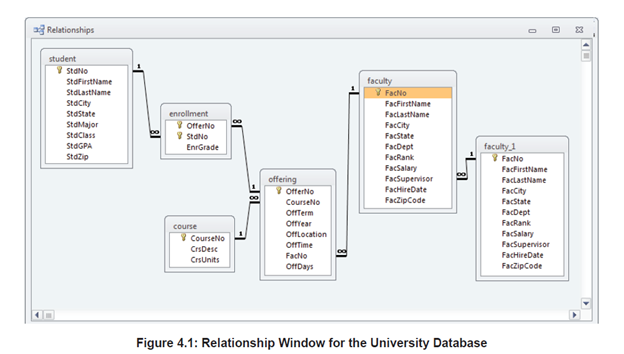

In [ ]:
#Question 1-List all student related inofrmation if second letter of  student's last name  is O.
#Hint -you may need to use but % and _
txt='''
SELECT *
FROM Student
WHERE StdLastName LIKE '_O%'
'''
Q1 =  psql.sqldf(txt)
Q1

,StdNo,StdFirstName,StdLastName,StdCity,StdState,StdZip,StdMajor,StdClass,StdGPA
0,124-56-7890,BOB,NORBERT,BOTHELL,WA,98011-2121,FIN,JR,2.7
1,567-89-0123,MARIAH,DODGE,SEATTLE,WA,98114-0021,IS,JR,3.6
2,678-90-1234,TESS,DODGE,REDMOND,WA,98116-2344,ACCT,SO,3.3
3,789-01-2345,ROBERTO,MORALES,SEATTLE,WA,98121-2212,FIN,JR,2.5
4,876-54-3210,CRISTOPHER,COLAN,SEATTLE,WA,98114-1332,IS,SR,4.0


In [ ]:
#Question 2-List unique City names where Student or Faculty live. Name the column AS City.
txt='''
Select Distinct StdCity AS City
From Student
UNION
Select Distinct FacCity AS City
From Faculty
'''
Q2 =  psql.sqldf(txt)
Q2

,City
0,BELLEVUE
1,BOTHELL
2,REDMOND
3,SEATTLE
4,TACOMA


In [ ]:
#Question 3-List unique City names where both  Student and Faculty live in .
txt='''
Select Distinct StdCity AS City
From Student
INTERSECT
Select Distinct FacCity AS City
From Faculty
'''
Q3 =  psql.sqldf(txt)
Q3

,City
0,BOTHELL
1,SEATTLE


In [ ]:
#Question 4-List unique City names where Student lives but  Faculty does not live in .
txt='''
Select Distinct StdCity AS City
From Student
EXCEPT
Select Distinct FacCity AS City
From Faculty
'''
Q4 =  psql.sqldf(txt)
Q4

,City
0,REDMOND
1,TACOMA


In [ ]:
#Question 5-List unique City names where Faculty livess but  Student does not live in .
txt='''
Select Distinct FacCity AS City
From Faculty
EXCEPT
Select Distinct StdCity AS City
From Student
'''
Q5 =  psql.sqldf(txt)
Q5

,City
0,BELLEVUE


In [ ]:
#Question 6-What is the mininimum, maximum and average GPA of Student?
#How many students are there in student table?
txt='''
SELECT MIN(StdGPA) AS MinGPA, MAX(StdGPA) AS MaxGPA, AVG(StdGPA) AS AvgGPA, Count(*) AS NoStudents
From Student
'''
Q6 =  psql.sqldf(txt)
Q6

,MinGPA,MaxGPA,AvgGPA,NoStudents
0,2.2,4.0,3.145455,11


In [ ]:
#Question 7-Summarize minimum and maximium and average  GPA of student by StdClass.
#How many student are there in each class?
txt='''
SELECT StdClass, MIN(StdGPA) AS MinGPA, MAX(StdGPA) AS MaxGPA, AVG(StdGPA) AS AvgGPA, Count(*) AS NoStudents
From Student
GROUP BY StdClass
'''
Q7 =  psql.sqldf(txt)
Q7

,StdClass,MinGPA,MaxGPA,AvgGPA,NoStudents
0,FR,3.0,3.0,3.000,1
1,JR,2.5,3.6,3.075,4
2,SO,3.3,3.8,3.550,2
3,SR,2.2,4.0,3.050,4


In [ ]:
#Question 8-How many student lives in each city? Calculate the average StdGPA of student
#order the city names descending order.
txt='''
SELECT StdCity, COUNT(*), AVG(StdGPA)
FROM Student
GROUP BY StdCity
ORDER BY StdCity DESC
'''
Q8 =  psql.sqldf(txt)
Q8

,StdCity,COUNT(*),AVG(StdGPA)
0,TACOMA,1,3.500000
1,SEATTLE,7,3.042857
2,REDMOND,1,3.300000
3,BOTHELL,2,3.250000


In [ ]:
#Question 9-List the  the average StdGPA of student based on StdCity.
#how many students lives in Each City
#Order the city names in descending order.
txt='''
SELECT StdCity, COUNT(*), AVG(StdGPA)
FROM Student
GROUP BY StdCity
ORDER BY StdCity DESC
'''
Q9 =  psql.sqldf(txt)
Q9

,StdCity,COUNT(*),AVG(StdGPA)
0,TACOMA,1,3.500000
1,SEATTLE,7,3.042857
2,REDMOND,1,3.300000
3,BOTHELL,2,3.250000


In [ ]:
#Query 10-List the  the average StdGPA of student based on StdCity if there
#are more than 1 student lives in the city .Order the city names in ascending order.
#Hint: you will use group by and having

txt='''
SELECT StdCity,	count(*),	AVG(StdGPA)
From Student
GROUP BY StdCity
HAVING count(*)>1
'''
Q10=  psql.sqldf(txt)
Q10

,StdCity,count(*),AVG(StdGPA)
0,BOTHELL,2,3.250000
1,SEATTLE,7,3.042857


In [ ]:
#Query 11-How many faculty membes are there in each department?
#Calculate the  the average salary of faculty in each department?

txt='''
SELECT FacDept, COUNT(*) AS NoFac,	AVG(FacSalary) AS AvgSalary
FROM Faculty
GROUP BY FacDept

'''
Q11 =  psql.sqldf(txt)
Q11

,FacDept,NoFac,AvgSalary
0,FIN,2,70000.0
1,MS,4,66250.0


In [ ]:
##Query 12-Get All student related information of student with lowest GPA.

txt='''
SELECT *
FROM Student
ORDER BY StdGPA
LIMIT 1
'''
Q12 =  psql.sqldf(txt)
Q12

,StdNo,StdFirstName,StdLastName,StdCity,StdState,StdZip,StdMajor,StdClass,StdGPA
0,890-12-3456,LUKE,BRAZZI,SEATTLE,WA,98116-0021,IS,SR,2.2
